## Load Libraries

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 

pd.set_option('display.max_columns', 100)

sns.set()

In [13]:
pip install --upgrade pandas numpy

Note: you may need to restart the kernel to use updated packages.


## Import data

#### Read the file "dataset.csv" and change all the column names to upper case.

### QUESTION 1: Transform raw data according to Data Dictionary [1m]

Refer to data_dictionary.csv and map the attributes values accordingly. 

For example, for "SEX" variable, the value "FEMALE" will take the value 1, while "MALE" will be assigned 2; "UNKNOWN" will be assigned 99. 

Perform the same operation for all the variables listed in the data dictionary such as "HOSPITALIZED", "INTUBATED" , "PNEUMONIA" ,"PREGNANCY" , 'SPEAKS_NATIVE_LANGUAGE', "DIABETES" , "COPD" , "ASTHMA" , "INMUSUPR" , "HYPERTENSION" , "OTHER_DISEASE" , "CARDIOVASCULAR" , "OBESITY" , 'CHRONIC_KIDNEY', "TOBACCO" , "ANOTHER CASE" ,"MIGRANT", "ICU", "OUTCOME", "NATIONALITY".

In [52]:
# Load your dataset (example: dataset.csv)
df = pd.read_csv("dataset.csv") 
data_dict = pd.read_excel('data_dictionary.xlsx')

# Example mappings for transformation
mappings = {
    "SEX": {1: "FEMALE", 2: "MALE", 99: "UNKNOWN"},
    "HOSPITALIZED": {1: "NO", 0: "YES", 99: "UNKNOWN"},
    "INTUBATED": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "PNEUMONIA": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "PREGNANCY": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "SPEAKS_NATIVE_LANGUAGE": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "DIABETES": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "COPD": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "ASTHMA": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "IMMUNOSUPR": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "HYPERTENSION": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "OTHER_DISEASE": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "CARDIOVASCULAR": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "OBESITY": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "CHRONIC_KIDNEY": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "TOBACCO": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "ANOTHER_CASE": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "ICU": {1: "YES", 0: "NO", 97: "DOES NOT APPLY", 98: "IGNORED", 99: "UNKNOWN"},
    "OUTCOME": {1: "POSITIVE", 2: "NEGATIVE", 3: "PENDING"},
    "NATIONALITY": {1: "MEXICAN", 2: "FOREIGN", 99: "UNKNOWN"},
}

# Ensure all columns are numeric before mapping (if needed)
for column in mappings.keys():
    if column in df.columns:
        df[column] = pd.to_numeric(df[column], errors="coerce")

# Map values in each column according to the mappings dictionary
for column, mapping in mappings.items():
    if column in df.columns:
        df[column] = pd.to_numeric(df[column], errors="coerce")
        df[column] = df[column].map(mapping)

# Display the transformed DataFrame
print(df.head())
# Export the transformed DataFrame to a CSV file

output_file = "transformed_dataset.csv"  # Specify the output file name
df.to_csv(output_file, index=False)

print(f"Transformed dataset has been exported to {output_file}")

          ORIGIN SECTOR  TREATMENT_LOCATION     SEX  BIRTHPLACE_LOCATION  \
0  OUTSIDE USMER  STATE                   2  FEMALE                    2   
1  OUTSIDE USMER  STATE                  15    MALE                   15   
2  OUTSIDE USMER  STATE                   2  FEMALE                    2   
3  OUTSIDE USMER  STATE                  15    MALE                    9   
4  OUTSIDE USMER   IMSS                  25    MALE                   25   

   PATIENT_LOCATION  MUNICIPALITY HOSPITALIZED ADMISSION DATE  \
0                 2             4           NO     2020-04-22   
1                15            33          NaN     2020-05-18   
2                 2             2           NO     2020-05-22   
3                15            87           NO     2020-06-05   
4                25             6           NO     2020-04-22   

  DATE_OF_FIRST_SYMPTOM DATE_OF_DEATH       INTUBATED PNEUMONIA  AGE  \
0            2020-04-18           NaN  DOES NOT APPLY       NaN   60   
1       

### QUESTION 2: Which age groups are most susceptible to COVID-19? [1m]

Cut the AGE into bins of [0,10,20,30,40,50,60,70,80,90,100].

In [53]:
# Create a copy of the dataset for analysis
analysis = df.copy()

# Define age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Cut the AGE into bins in the analysis DataFrame
analysis['AGE_GROUP'] = pd.cut(analysis['AGE'], bins=bins, labels=labels, right=False)

# Count the number of cases in each age group
age_group_counts = analysis['AGE_GROUP'].value_counts().sort_index()

# Print the counts for each age group
print(age_group_counts)

AGE_GROUP
0-9        1614
10-19      3131
20-29     20485
30-39     35386
40-49     36445
50-59     30453
60-69     18604
70-79      9519
80-89      3568
90-100      559
Name: count, dtype: int64


### QUESTION 3: Based on the above information, plot a bar chart. [1m]

Use the same bin as in Question 2.

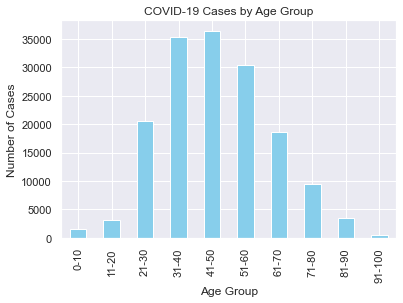

In [16]:
# Plot the distribution
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('COVID-19 Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.show() 

### QUESTION 4: Based on the above information, plot a histogram. [1m]

Use the same bin as in Question 2.

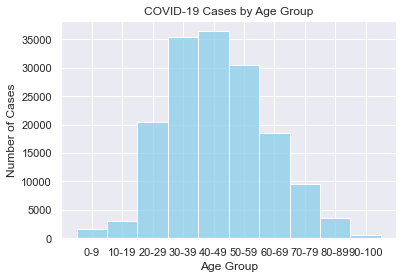

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a copy of the dataset for analysis
analysis = df.copy()

# Define age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Cut the AGE into bins in the analysis DataFrame
analysis['AGE_GROUP'] = pd.cut(analysis['AGE'], bins=bins, labels=labels, right=False)

# Plot the histogram using sns.histplot
sns.histplot(data=analysis, x='AGE_GROUP', color='skyblue', discrete=True)

# Set the title and labels
plt.title('COVID-19 Cases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.show()

### QUESTION 5: Distribution of cases by gender & age group [1m]

Use the same bin as in Question 2.

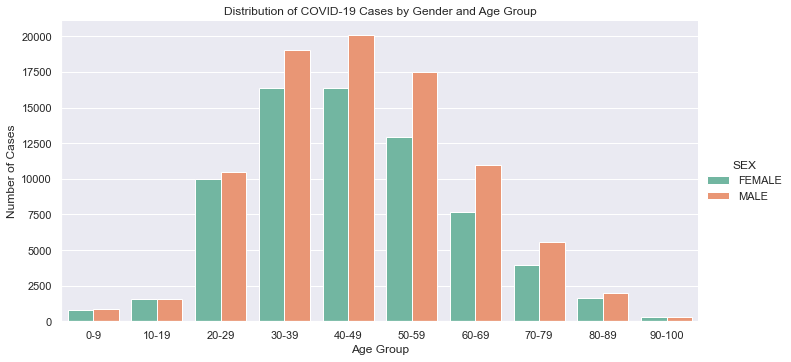

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a copy of the dataset for analysis
analysis = df.copy()

# Define age bins and labels
bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Cut the AGE into bins in the analysis DataFrame
analysis['AGE_GROUP'] = pd.cut(analysis['AGE'], bins=bins, labels=labels, right=False)

sns.catplot(
    data=analysis,
    x="AGE_GROUP",
    hue="SEX",  
    kind="count",
    aspect=2,
    palette="Set2"
)

# Set the title and labels
plt.title('Distribution of COVID-19 Cases by Gender and Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Cases')
plt.show()

### QUESTION 6: How many patients required intubation? [1m]

Produce a bar chart

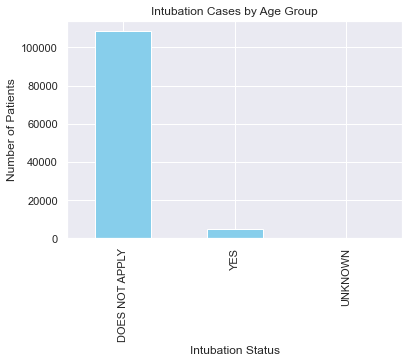

In [42]:
import matplotlib.pyplot as plt

# Filter data for intubation 
intubated_patients = df['INTUBATED'].value_counts()


# Plot the distribution
intubated_patients.plot(kind='bar', color='skyblue')
plt.title('Number of Patients Requiring Intubation')
plt.xlabel('Intubation Status')
plt.ylabel('Number of Patients')
plt.show()

### QUESTION 7. Any correlations between other diseases and ICU admission?[1m]

The diseases are "DIABETES", "COPD", "ASTHMA", "INMUSUPR", "HYPERTENSION", "CARDIOVASCULAR", "OBESITY", "CHRONIC_KIDNEY","TOBACCO"

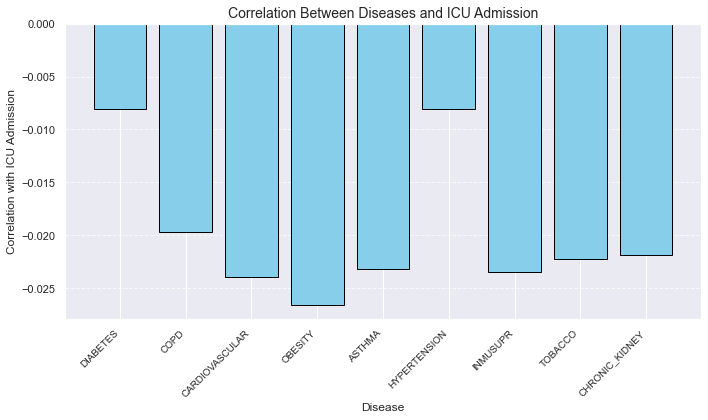

In [48]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "dataset.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)

# Data Cleaning: Replace 'unknown' values (e.g., 99) with NaN and filter diseases + ICU
columns_of_interest = ['ICU', 'DIABETES', 'COPD', 'CARDIOVASCULAR', 'OBESITY',
                        'ASTHMA', 'HYPERTENSION', 'INMUSUPR', 'TOBACCO', 'CHRONIC_KIDNEY']

# Ensure only relevant columns are selected and replace invalid values
data_cleaned = data[columns_of_interest].replace(99, pd.NA).dropna()

# Calculate correlations between ICU and diseases
correlations = data_cleaned.corr().loc['ICU', columns_of_interest[1:]]  # Exclude 'ICU' itself

# Convert correlations to a DataFrame for easier plotting
correlation_df = correlations.reset_index()
correlation_df.columns = ['Disease', 'Correlation']

# Plot the correlations as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(correlation_df['Disease'], correlation_df['Correlation'], color='skyblue', edgecolor='black')
plt.title("Correlation Between Diseases and ICU Admission", fontsize=14)
plt.xlabel("Disease", fontsize=12)
plt.ylabel("Correlation with ICU Admission", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

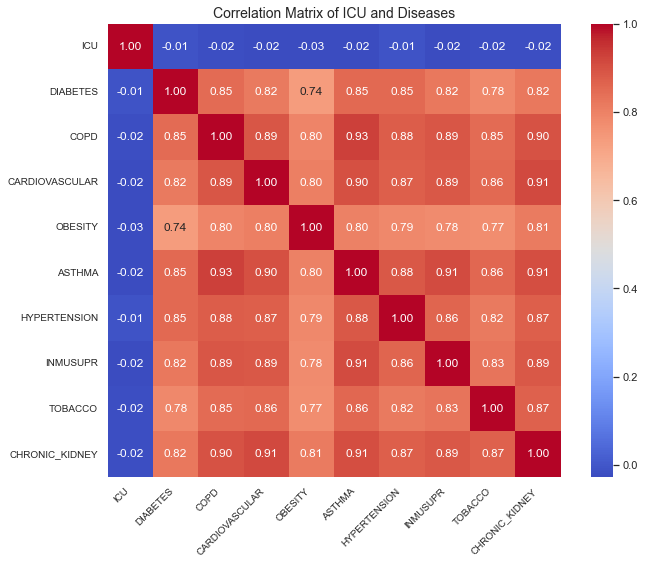

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "dataset.csv"  # Replace with the actual file path
data = pd.read_csv(file_path)

# Data Cleaning: Replace 'unknown' values (e.g., 99) with NaN and filter diseases + ICU
columns_of_interest = ['ICU', 'DIABETES', 'COPD', 'CARDIOVASCULAR', 'OBESITY',
                        'ASTHMA', 'HYPERTENSION', 'INMUSUPR', 'TOBACCO', 'CHRONIC_KIDNEY']

# Ensure only relevant columns are selected and replace invalid values
data_cleaned = data[columns_of_interest].replace(99, pd.NA).dropna()

# Calculate the correlation matrix
correlation_matrix = data_cleaned.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Matrix of ICU and Diseases", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

### QUESTION 8. What are the common diseases that the deceased patients had?[1m]

#### Produce a bar chart

DIABETES          361879
COPD              379854
ASTHMA            379317
INMUSUPR          387647
HYPERTENSION      352901
CARDIOVASCULAR    383657
OBESITY           356636
CHRONIC_KIDNEY    381973
TOBACCO           376749
dtype: int64


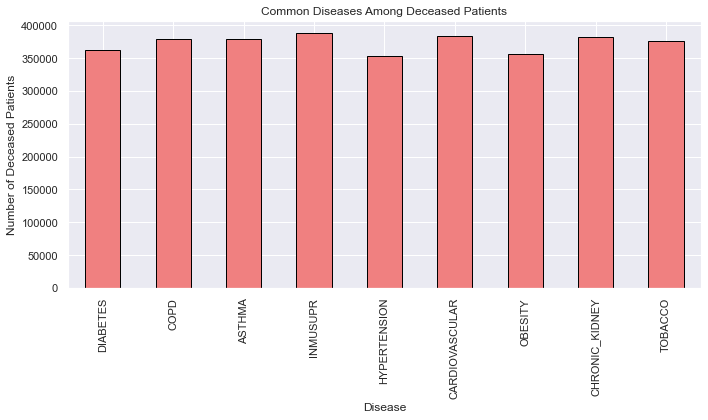

In [50]:
# List of disease columns
disease_columns = [
    'DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION', 'CARDIOVASCULAR', 
    'OBESITY', 'CHRONIC_KIDNEY', 'TOBACCO'
]

# Filter the dataset to include only deceased patients
# Assuming 'OUTCOME' is 1 for deceased and 0 for survived
deceased_patients = df[df['OUTCOME'] == 1]

# Count the number of deceased patients with each disease
disease_counts = deceased_patients[disease_columns].sum()
print(disease_counts)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
disease_counts.plot(kind='bar', color='lightcoral', edgecolor='black')

# Adding titles and labels
plt.title('Common Diseases Among Deceased Patients')
plt.xlabel('Disease')
plt.ylabel('Number of Deceased Patients')
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

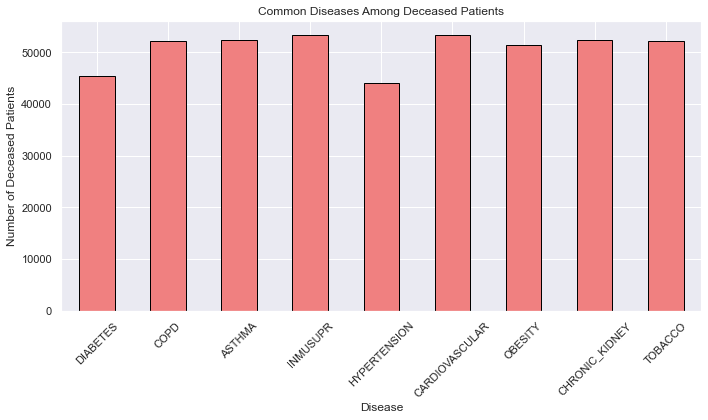

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('dataset.csv')

# List of disease columns
disease_columns = [
    'DIABETES', 'COPD', 'ASTHMA', 'INMUSUPR', 'HYPERTENSION', 'CARDIOVASCULAR', 
    'OBESITY', 'CHRONIC_KIDNEY', 'TOBACCO'
]

# Filter the dataset to include only deceased patients (date_of_death is not null)
deceased_patients = df[df['DATE_OF_DEATH'].notna()]

# Count the number of deceased patients with each disease
disease_counts = deceased_patients[disease_columns].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
disease_counts.plot(kind='bar', color='lightcoral', edgecolor='black')

# Adding titles and labels
plt.title('Common Diseases Among Deceased Patients')
plt.xlabel('Disease')
plt.ylabel('Number of Deceased Patients')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()

### Question 9: Streamlit Development

In this question, you are required to develop an interactive UI using streamlit and hosting it to Streamlit cloud. Your streamlit app should demonstrate 3 different interactive charts. That is, changing or selecting different parameters, the charts will change accordingly. 
